In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
RC = np.loadtxt("rnd_sph_cat_R95.0_cut_0.cat")
RC.shape

N_rnd = RC.shape[0]

OC = np.loadtxt("sphere_data_cut_0.dat")
OC.shape

N_obs = OC.shape[0]
##### RE-CENERING!!!!  ############################################# Hey! To Do Centering

for x in OC:
    x += np.array([400,400,400])
    
FC = np.loadtxt("FC_CUT_0.cat")
FC.shape

XDLBSkel = np.loadtxt("0.BSKIndex")
XDLBSkel.shape

a = XDLBSkel[:,0]
a = list(a)
b = XDLBSkel[:,1]
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T

print("Beta Skeleton array.shape:", fcBSkel.shape)
print("")

VoidParticleCat = np.loadtxt("void_masterlist_0.cat")
print("Void Particle Cat")
print("VoidID, x, y, z")
print("Shape", VoidParticleCat.shape)

Beta Skeleton array.shape: (221050, 2)

Void Particle Cat
VoidID, x, y, z
Shape (15076, 4)


In [3]:
Void_N_particles_list = VoidParticleCat[:,0].astype(int)

Void_N_Particles = []

for i in range( Void_N_particles_list.max()):
    index = np.where(Void_N_particles_list == i)[0]
    Void_N_Particles.append([i, index.shape[0]])
    
Void_N_Particles = np.array(Void_N_Particles).astype("int")

<IPython.core.display.Javascript object>


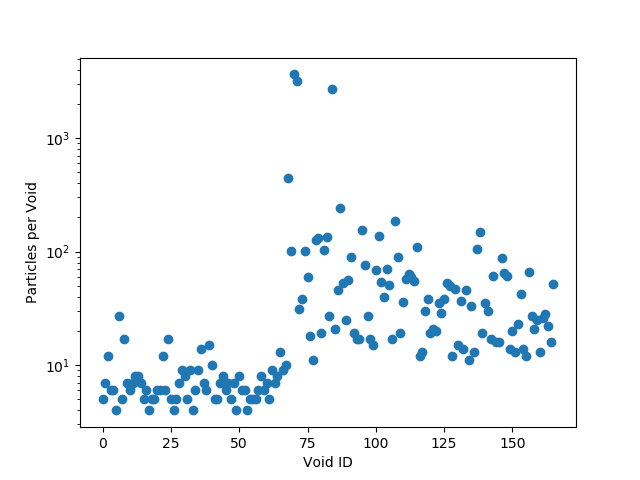

In [4]:
plt.scatter( Void_N_Particles[:,0], Void_N_Particles[:,1])
plt.yscale("log")

plt.ylabel("Particles per Void")
plt.xlabel("Void ID")

plt.show()

 ## Some useful plotting functions.

In [5]:
def PlotVoidInCatalog(ID, s=10):

    index = np.where( VoidParticleCat[:,0] == ID )[0]

    X = VoidParticleCat[index,1]
    Y = VoidParticleCat[index,2]
    Z = VoidParticleCat[index,3]

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.set_zlim(-100,100)
    
    ax.scatter( 0, 0, 0 )
    ax.scatter( X, Y, Z,  s=s, c = "blue" )

    
    x = OC[:,0]
    y = OC[:,1]
    z = OC[:,2]
    ax.scatter( x, y, z,  s=0.01, c = "red" )

        
    ax.view_init(15, 30)

    plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
    plt.tight_layout()


    #plt.savefig("./tagging_voids.pdf", format="pdf")
    #plt.close()

    plt.show()
    
def PlotVoidParticles(ID, s=20):

    index = np.where( VoidParticleCat[:,0] == ID)[0]
    Void_ID = VoidParticleCat[index, 1:4]
    
    x = Void_ID[:,0]
    y = Void_ID[:,1]
    z = Void_ID[:,2]

    print("Number of particles = ", x.shape[0])
    
    x_c = x.mean()
    y_c = y.mean()
    z_c = z.mean()

    x -= x.mean()
    y -= y.mean()
    z -= z.mean()

    for i in range( x.shape[0]):
        print(x[i], y[i], z[i])
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')      
    ax.view_init(15, 30)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    ax.scatter(x,y,z)
    
    plt.show()

<IPython.core.display.Javascript object>


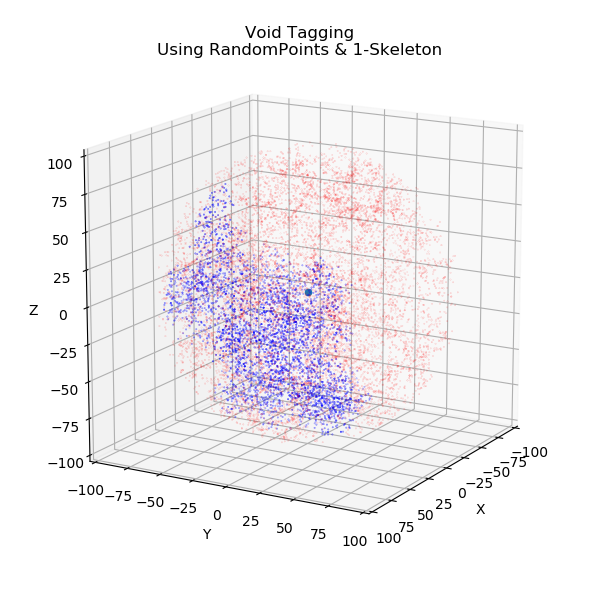

In [6]:
# Find the biggest void

index = np.where( Void_N_Particles[:,1] == Void_N_Particles[:,1].max() )[0]
ID = Void_N_Particles[index][0,0]


PlotVoidInCatalog(ID,0.1)

<IPython.core.display.Javascript object>


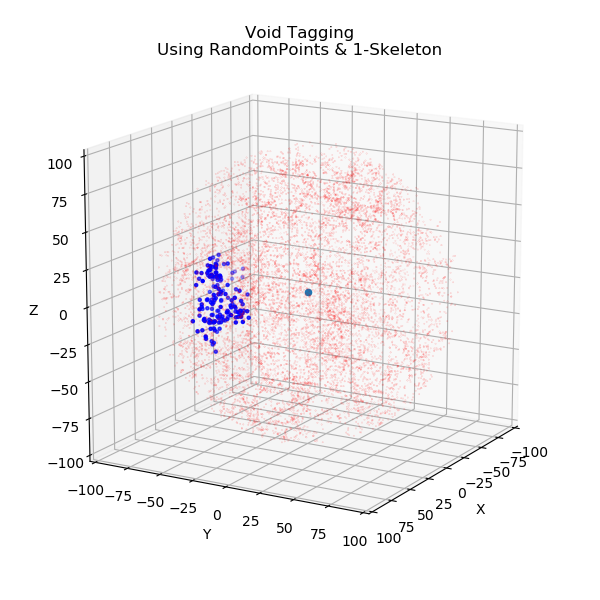

In [7]:
PlotVoidInCatalog(95, 5)

# Calculate Inertia Tensor

<IPython.core.display.Javascript object>


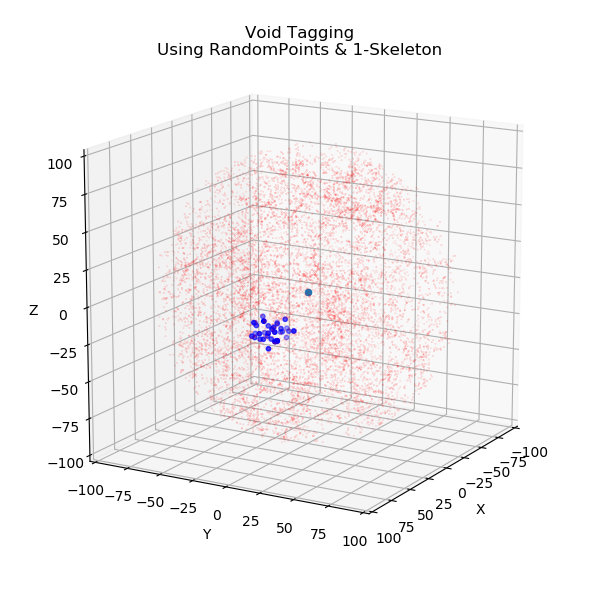

In [10]:
n = 123

PlotVoidInCatalog(n, 10)

In [11]:


index = np.where( VoidParticleCat[:,0] == n)[0]
Void_n = VoidParticleCat[index, 1:4]
particles_void_N = Void_n.shape[0]

In [12]:
Void_n

array([[ 87.59817113,  28.47266956,  -7.37031945],
       [ 87.59817113,  28.47266956,  -7.37031945],
       [ 85.01280642,  10.81557446,   1.20990484],
       [ 79.20178699,  29.40208073,   4.7779795 ],
       [ 88.10121392,  22.20205072,  -3.24418233],
       [ 77.47610807,  24.96618565,  -4.68486097],
       [ 76.13450851,  30.28456169,  -3.67603448],
       [ 82.05434419,  25.26761711,   1.97761816],
       [ 90.25123366,  23.64890615, -12.63809001],
       [ 85.56846233,  22.9011389 ,  -7.54690669],
       [ 87.12704503,  27.00201215,  -8.11561106],
       [ 86.03487788,  23.75003838,  -0.8311738 ],
       [ 88.01762671,  26.94241378,  -1.82970109],
       [ 91.7623713 ,  17.93984143,  -3.24646313],
       [ 86.85323307,  12.0328808 ,  -5.05816255],
       [ 89.05667111,  16.83478258,  -7.67726857],
       [ 91.60048158,  14.41908313,  -6.25503892],
       [ 82.8482908 ,  15.18933938,   5.59844653],
       [ 89.7620236 ,  19.57490784,  -7.13790109],
       [ 80.90552733,  36.69293

In [13]:
x = Void_n[:,0]
y = Void_n[:,1]
z = Void_n[:,2]

x_c = x.mean()
y_c = y.mean()
z_c = z.mean()

x -= x.mean()
y -= y.mean()
z -= z.mean()

In [14]:
I_11 = 0
I_22 = 0
I_33 = 0

I_12 = 0
I_13 = 0
I_23 = 0

for k in range( particles_void_N ):
    I_11 += y[k]**2 + z[k]**2
    I_22 += z[k]**2 + x[k]**2
    I_33 += x[k]**2 + y[k]**2

    I_12 += - x[k] * y[k]
    I_13 += - z[k] * x[k]
    I_23 += - y[k] * z[k]
    
I_21 = I_12
I_31 = I_13
I_32 = I_23

I = np.array([
    [I_11, I_12, I_13],
    [I_21, I_22, I_23],
    [I_31, I_32, I_33]])

I = I/particles_void_N

In [15]:
I

array([[57.38517255, 15.30533332,  3.79711897],
       [15.30533332, 45.97039212,  4.56211077],
       [ 3.79711897,  4.56211077, 64.25848258]])

In [16]:
# w[i] = Eigenvalue_i
# v[:,i] = Eigenvector_i

w, v = np.linalg.eig(I)

# Ellipsoid

## Standard Equation

The surface of an ellipsoid is given by the equation:
\begin{equation}
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1 
\end{equation}
so, $a$, $b$ and $c$ are the semi-axes of the ellipsoid.

The volume enclosed is:

\begin{equation}
V = \frac{4\pi}{3}abc
\end{equation}

## Inertia Tensor:

If the ellipsoid mass is m, having the axis of the reference frame aligned with the 
ellipsoid semiaxes, we have the components of the inertia tensor given by:

$ I_a = \frac{m}{5}(b^2 + c^2) $

$ I_b = \frac{m}{5}(a^2 + c^2) $

$ I_c = \frac{m}{5}(a^2 + b^2) $

and the inertia tensor $I$ is:
\begin{equation}
    I = \left( 
    \begin{array}{ccc}
    I_a &  0  &  0 \\
    0   & I_b &  0 \\ 
    0   &  0  &  I_c 
    \end{array}\right)
\end{equation}

We have M particles per void. Setting the mass of each particle equal to the unit, $m=1$
\begin{equation}
    I = \frac{1}{5} \left( 
    \begin{array}{ccc}
    b^2 + c^2 &  0  &  0 \\
    0   & a^2 + c^2 &  0 \\ 
    0   &  0  &  a^2 + b^2 
    \end{array}\right)
\end{equation}

We can find the semiaxes as:

$ I_a + I_b = \frac{M}{5} \left[ (b^2 + c^2) + (a^2 + c^2) \right] $ 

$ I_a + I_b - I_c = \frac{M}{5} \left[ ( a^2 + b^2 + 2 c^2) - (a^2 + b^2) \right] $

$ I_a + I_b - I_c = \frac{2M}{5}  c^2 $

$ c = \sqrt{ \frac{5}{2M} \left( I_a + I_b - I_c \right)} $

In a similar fashion we get:

$ b = \sqrt{ \frac{5}{2M} \left( I_a - I_b + I_c \right)} $

$ a = \sqrt{ \frac{5}{2M} \left(-I_a + I_b + I_c \right)} $




Number of particles =  35
2.6049015101260693 6.013727443088531 -4.181113202067708
2.6049015101260693 6.013727443088531 -4.181113202067708
0.019536795580222588 -11.643367657220901 4.399111089452374
-5.791482631320662 6.943138616602187 7.967185755250492
3.107944304947125 -0.2568913952401388 -0.05497607614202549
-7.5171615521519755 2.5072435392505135 -1.495654714467499
-8.858761113938868 7.825619580890109 -0.48682822805457215
-2.938925432193855 2.8086750000876606 5.166824412300499
5.257964040033897 1.189964033096281 -9.448883754680972
0.5751927078459431 0.44219678414172847 -4.357700442075775
2.133775406636701 4.543070035947103 -4.926404803359617
1.0416082587392737 1.291096269924342 2.358032449115518
3.0243570902127317 4.483471672038505 1.3595051652587904
6.76910167995419 -4.519100681299751 -0.05725687778409849
1.8599634498018816 -10.426061316985635 -1.8689562958092654
4.063401488594707 -5.624159531282942 -4.48806232197313
6.60721195724814 -8.039858978932518 -3.065832671445405
-2.144978818

<IPython.core.display.Javascript object>


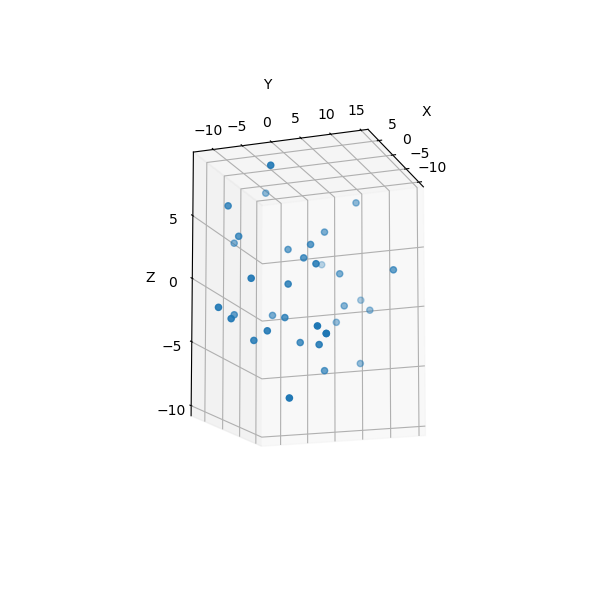

In [17]:
PlotVoidParticles(n)

In [25]:
w

array([20.32167112, 14.10716155,  8.14155316])

In [18]:
I_a = w[0]
I_b = w[1]
I_c = w[2]

In [19]:
a = ((5.0/2.0)*( -I_a + I_b + I_c))**0.5
b = ((5.0/2.0)*( +I_a - I_b + I_c))**0.5
c = ((5.0/2.0)*( +I_a + I_b - I_c))**0.5


In [20]:
V = ( np.pi * 4 / 3 ) * a * b * c

In [21]:
V

5408.63625762824

<IPython.core.display.Javascript object>


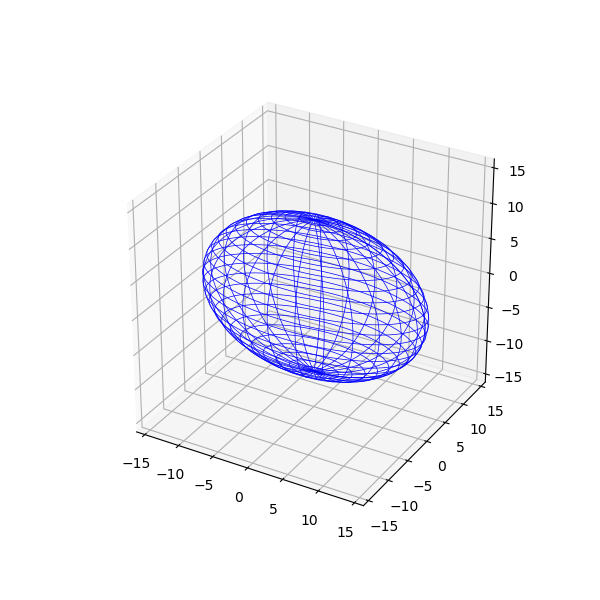

In [22]:
#fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
fig = plt.figure(figsize=(6,6))  # Square figure

ax = fig.add_subplot(111, projection='3d')
# Set of all spherical angles:
u_phi = np.linspace(0, 2 * np.pi, 100)
v_theta = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = a * np.outer(np.cos(u_phi), np.sin(v_theta))
y = b * np.outer(np.sin(u_phi), np.sin(v_theta))
z = c * np.outer(np.ones_like(u_phi), np.cos(v_theta))

# Plot:
#ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='r')
ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color="blue", linewidth=0.5 )


# Adjustment of the axes, so that they all have the same span:
max_radius = max(a, b, c)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

<IPython.core.display.Javascript object>


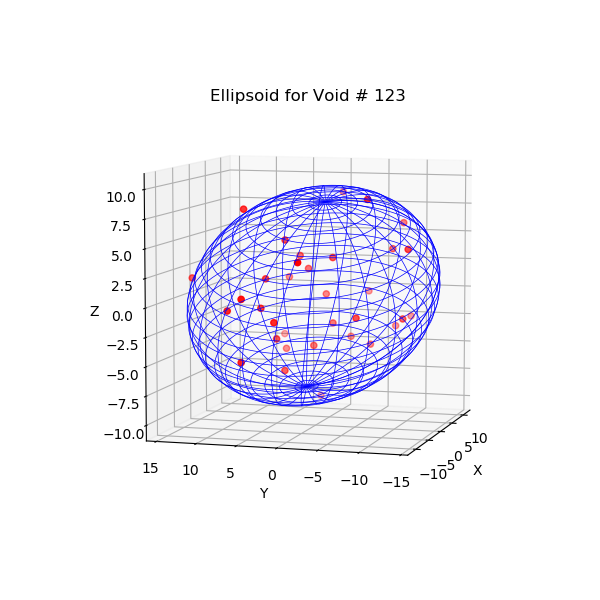

In [29]:
###############################################
#       Rotate the ellipsoid
#       to plot
#
Xt = np.zeros_like(x)
Yt = np.zeros_like(y)
Zt = np.zeros_like(z)

u1 = v[0,0]
u2 = v[1,0]
u3 = v[2,0]

v1 = v[0,1]
v2 = v[1,1]
v3 = v[2,1]

w1 = v[0,2]
w2 = v[1,2]
w3 = v[2,2]

for i in range(100):
    for j in range(100):
        Xt[i,j] = u1*x[i,j] + v1*y[i,j] + w1*z[i,j]
        Yt[i,j] = u2*x[i,j] + v2*y[i,j] + w2*z[i,j]
        Zt[i,j] = u3*x[i,j] + v3*y[i,j] + w3*z[i,j]
#
#  Rotated.
#####################################################
        
        
        
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Xt, Yt, Zt,  rstride=4, cstride=4, color="blue", linewidth=0.5 )

index = np.where( VoidParticleCat[:,0] == n)[0]
Void_ID = VoidParticleCat[index, 1:4]
x_p = Void_ID[:,0]
y_p = Void_ID[:,1]
z_p = Void_ID[:,2]


x_p -= x_p.mean()
y_p -= y_p.mean()
z_p -= z_p.mean()
     
ax.view_init(15, 30)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_title("Ellipsoid for Void # {}".format(n))

ax.scatter(x_p,y_p,z_p, color="red", s=20)

plt.show()

In [24]:
print(a,b,c)

15.580985302144597 7.624623024030815 10.868906976901728


In [26]:
4 * np.pi * a *b *c /3

5408.63625762824

In [30]:
!mkdir Void123

<IPython.core.display.Javascript object>


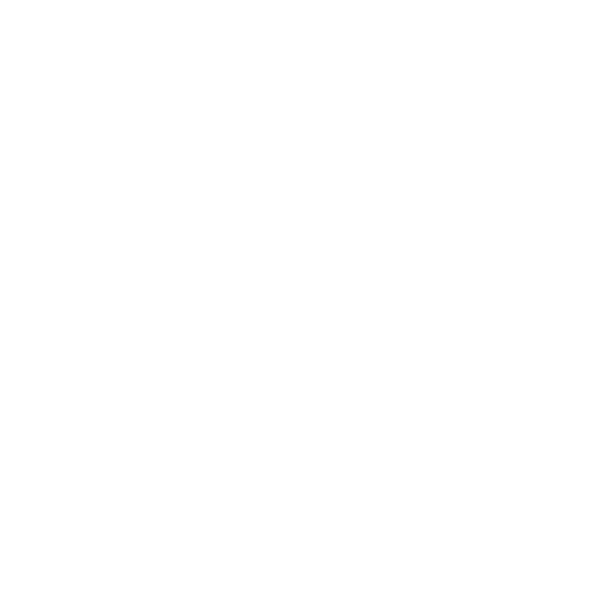

<IPython.core.display.Javascript object>


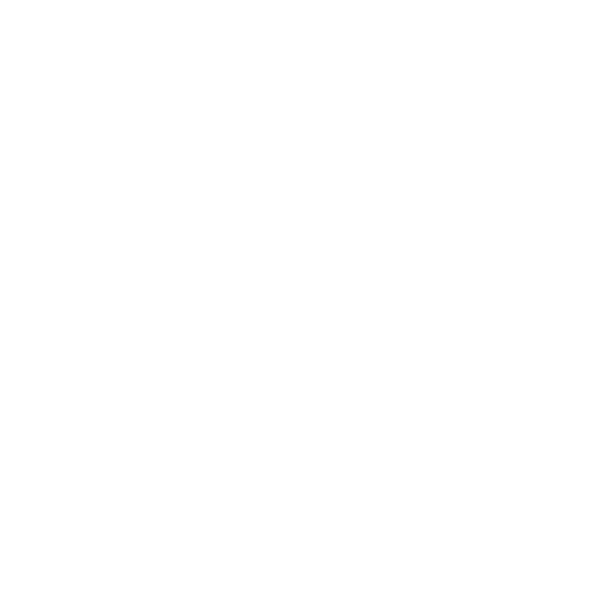

<IPython.core.display.Javascript object>


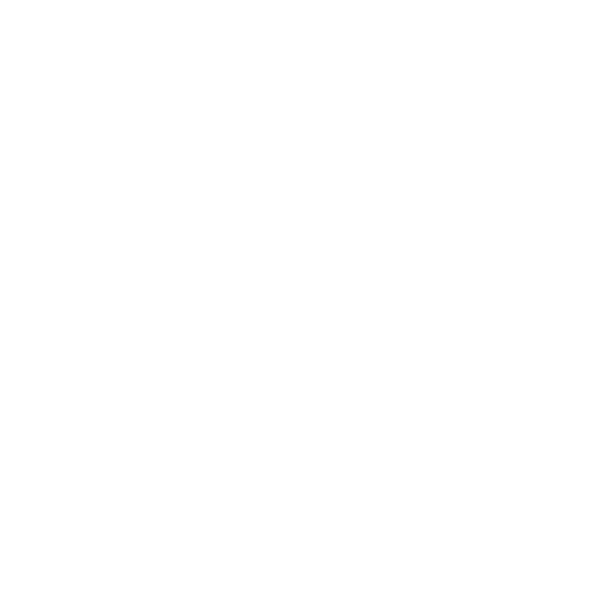

<IPython.core.display.Javascript object>


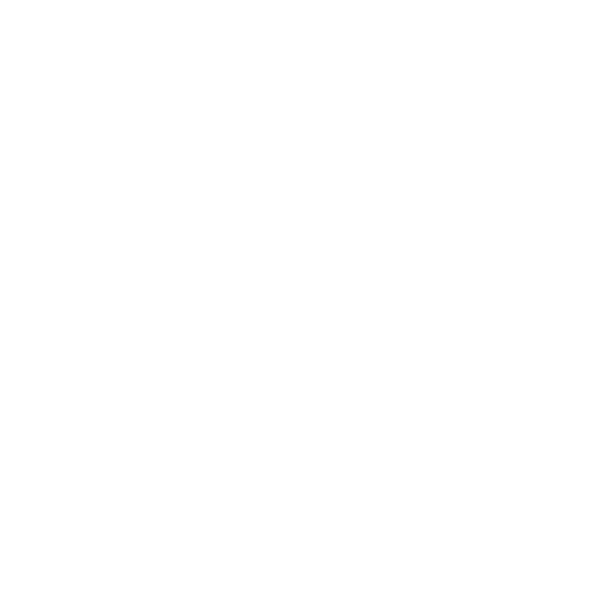

<IPython.core.display.Javascript object>


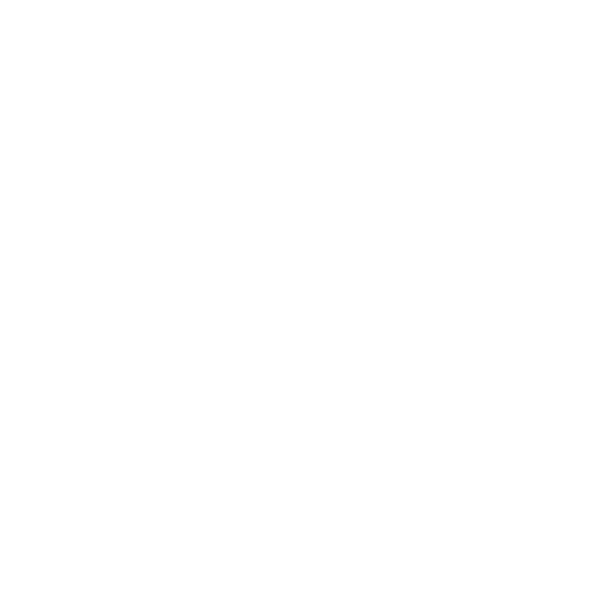

<IPython.core.display.Javascript object>


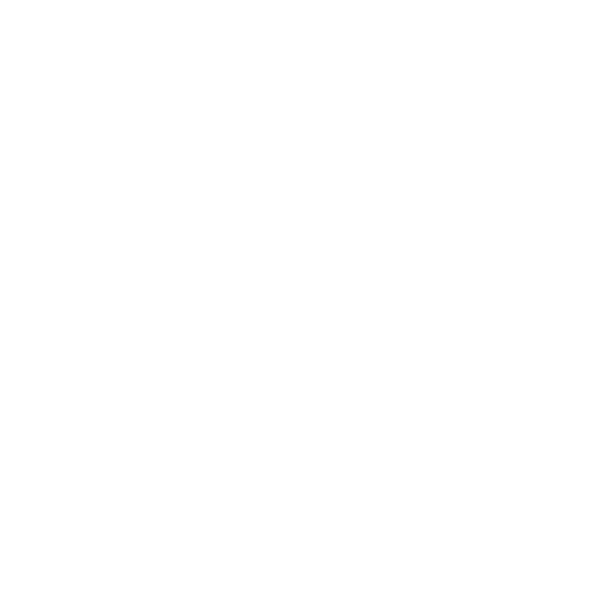

<IPython.core.display.Javascript object>


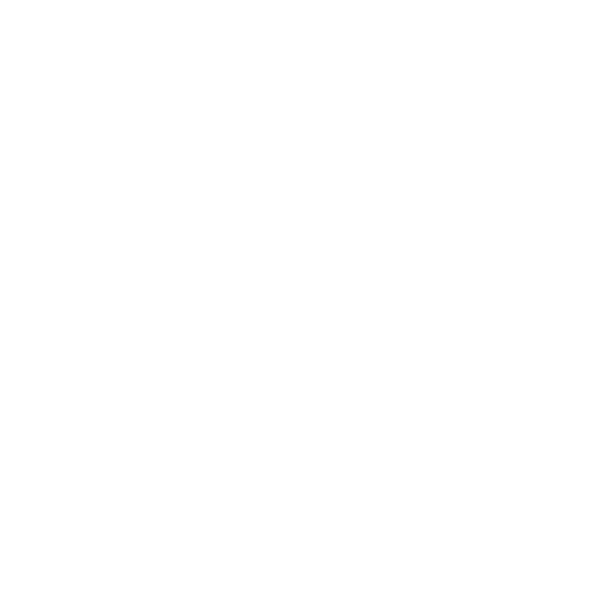

<IPython.core.display.Javascript object>


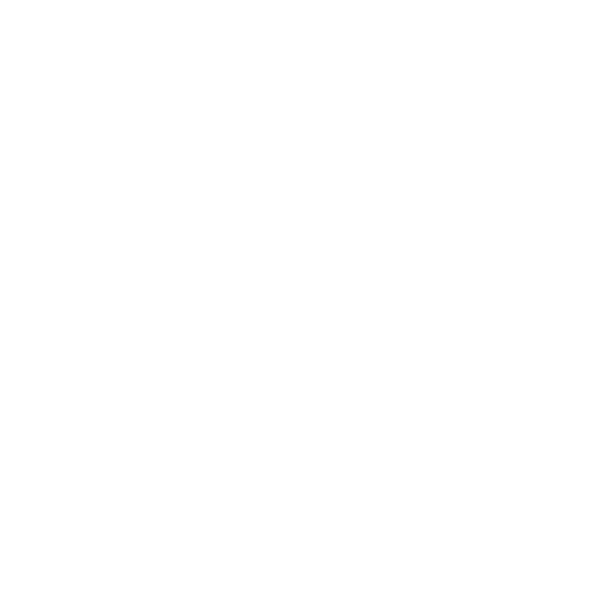

<IPython.core.display.Javascript object>


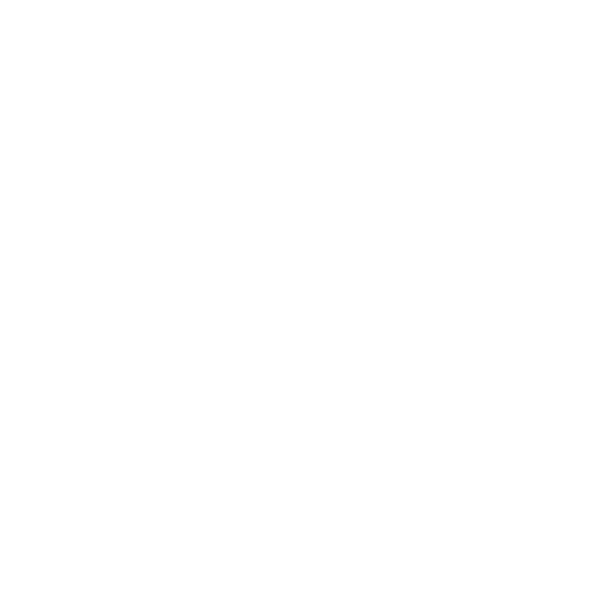

<IPython.core.display.Javascript object>


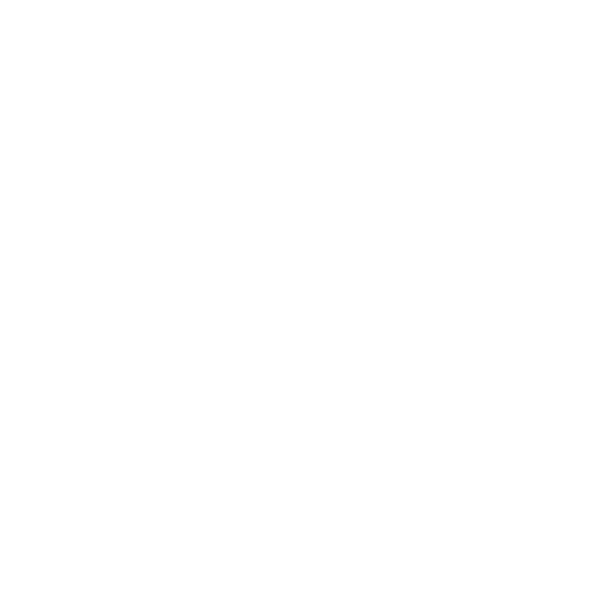

<IPython.core.display.Javascript object>


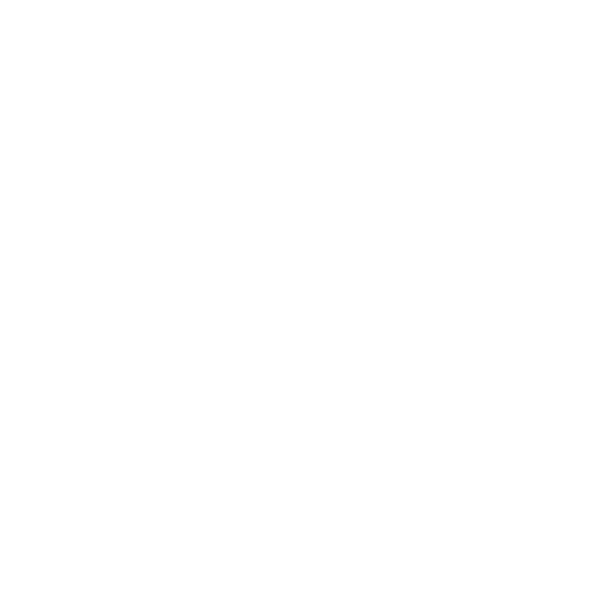

<IPython.core.display.Javascript object>


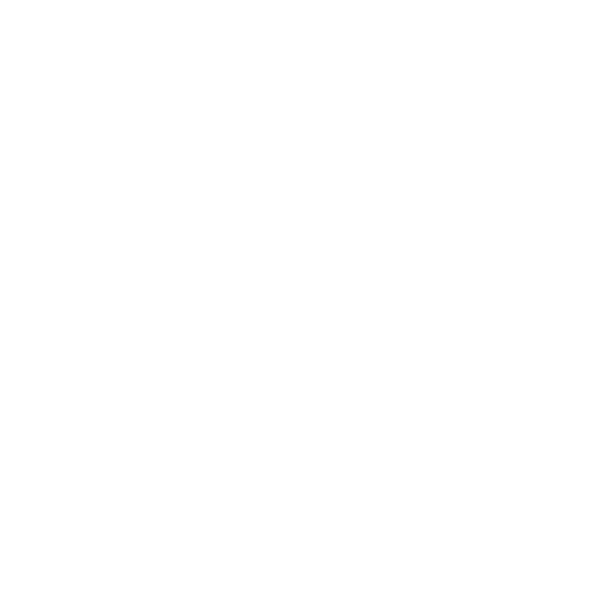

<IPython.core.display.Javascript object>


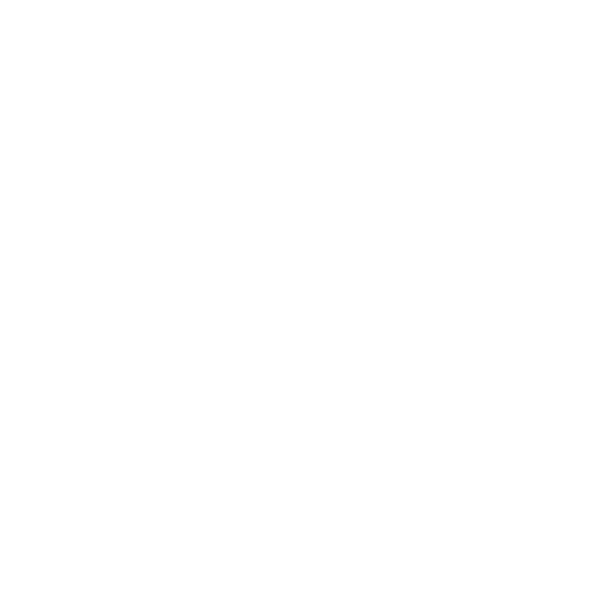

<IPython.core.display.Javascript object>


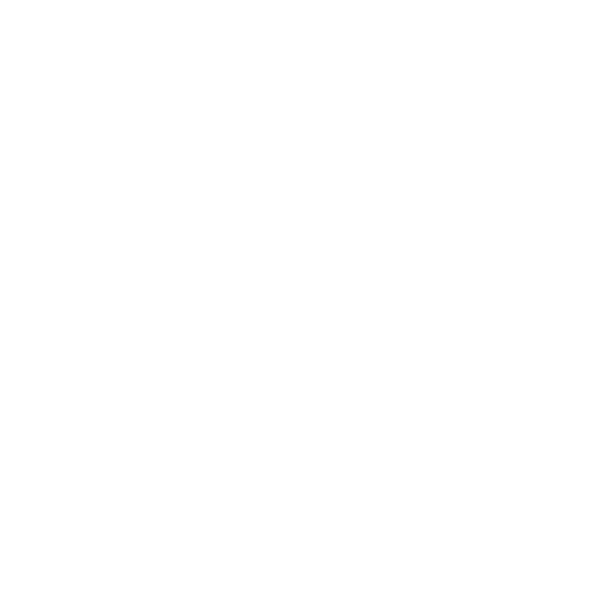

<IPython.core.display.Javascript object>


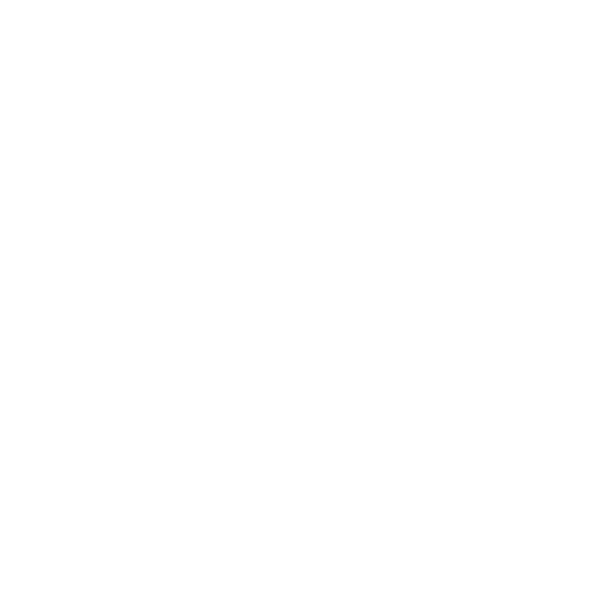

<IPython.core.display.Javascript object>


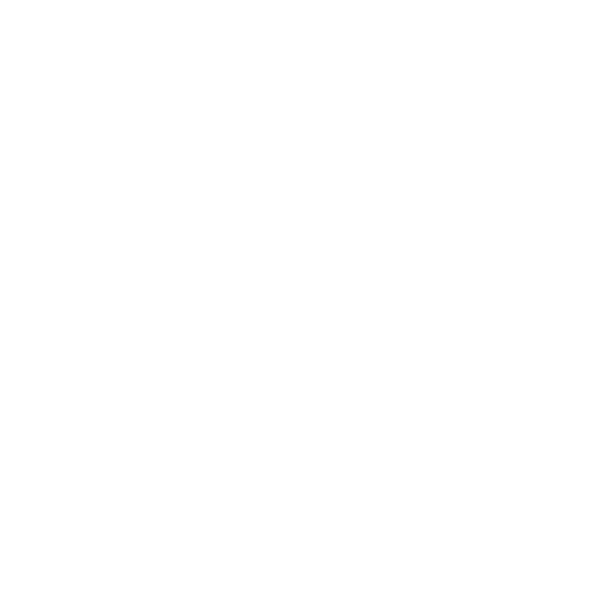

<IPython.core.display.Javascript object>


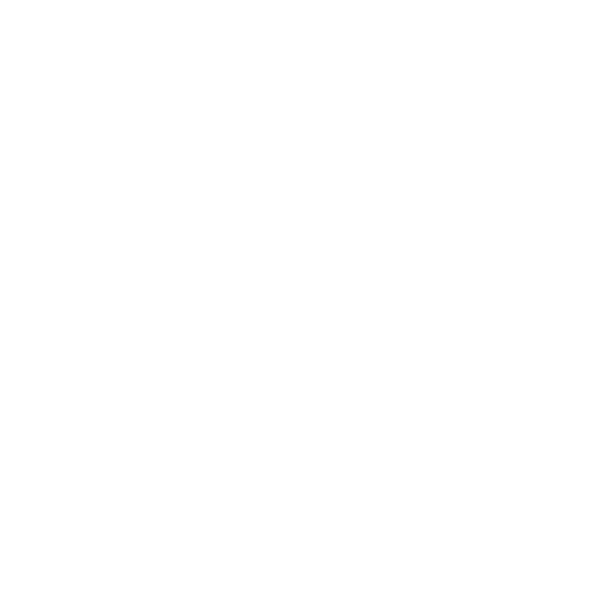

<IPython.core.display.Javascript object>


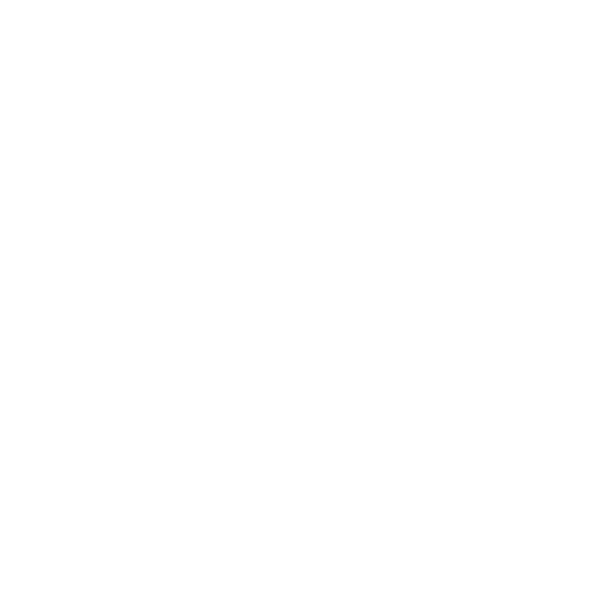

<IPython.core.display.Javascript object>


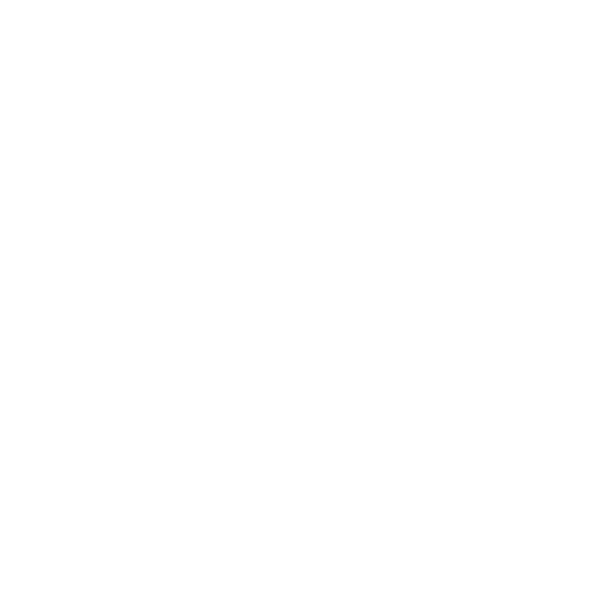

<IPython.core.display.Javascript object>


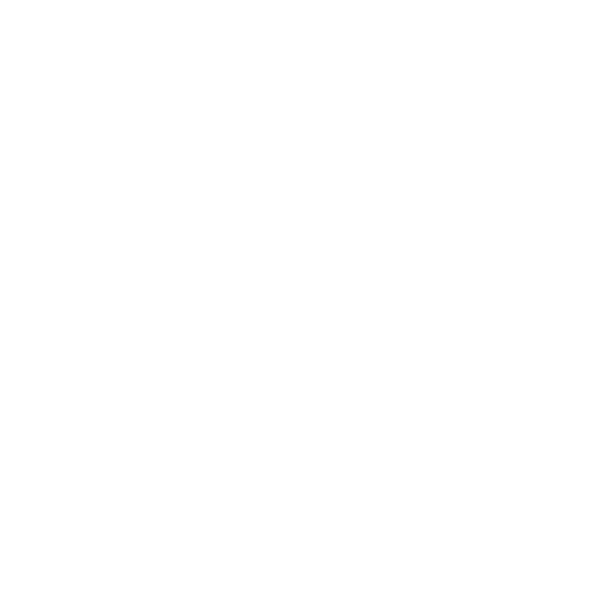

<IPython.core.display.Javascript object>


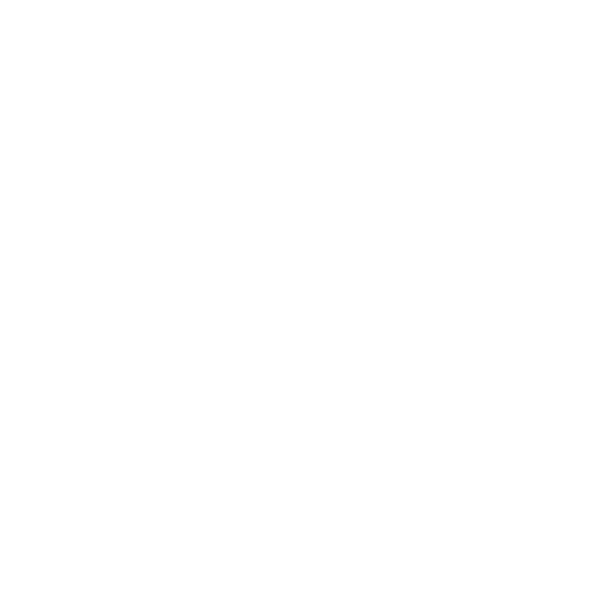

<IPython.core.display.Javascript object>


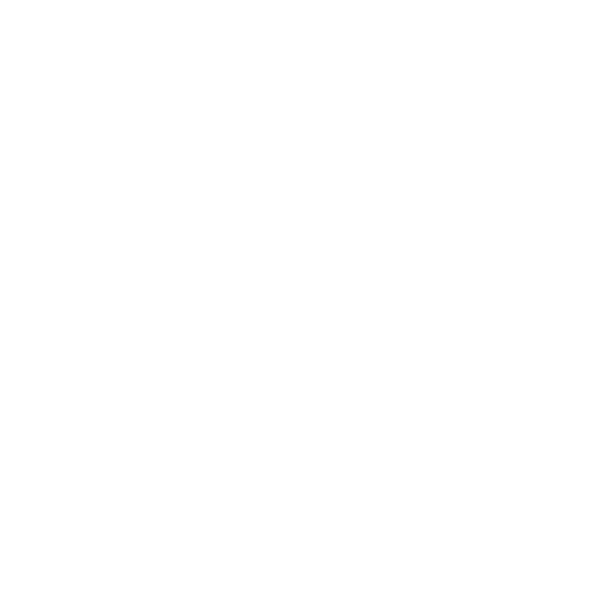

<IPython.core.display.Javascript object>


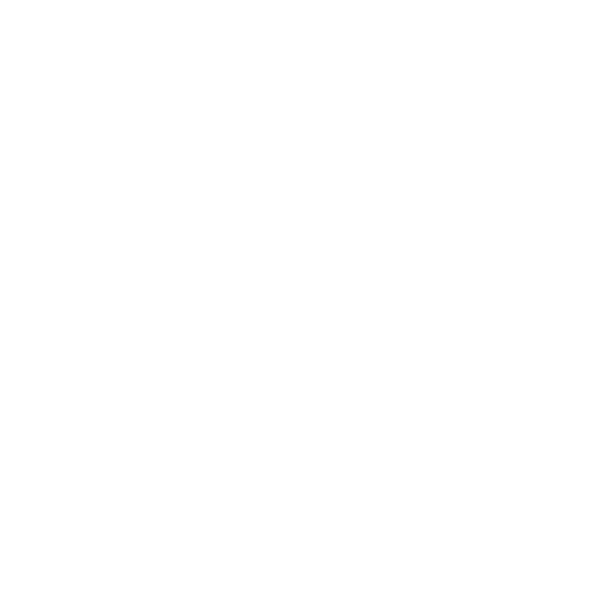

<IPython.core.display.Javascript object>


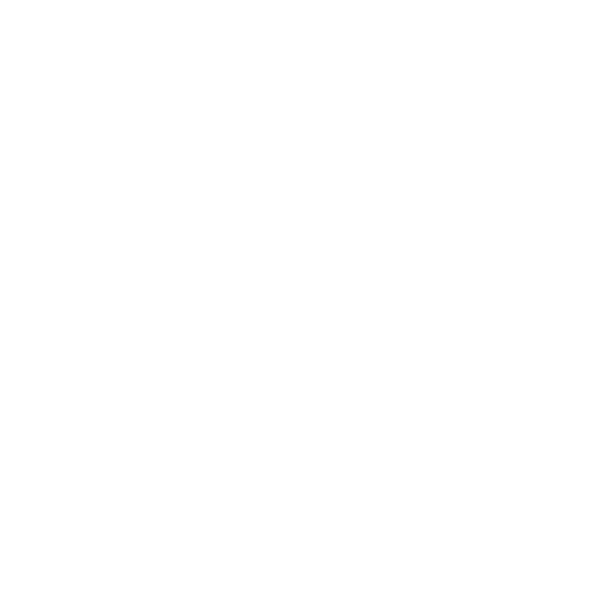

<IPython.core.display.Javascript object>


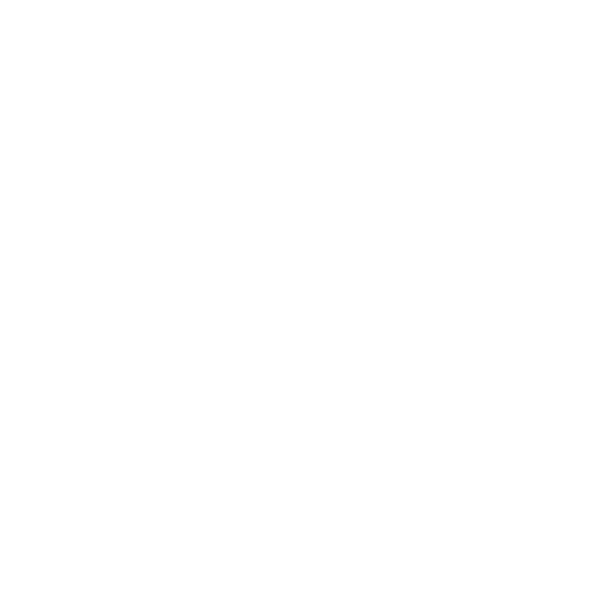

<IPython.core.display.Javascript object>


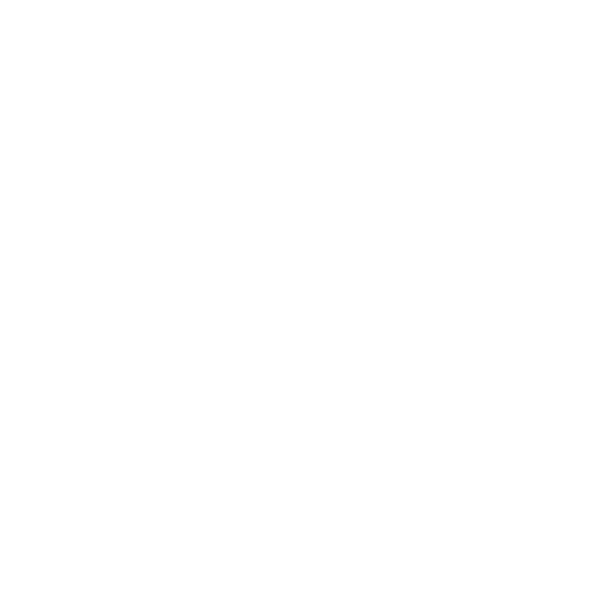

<IPython.core.display.Javascript object>


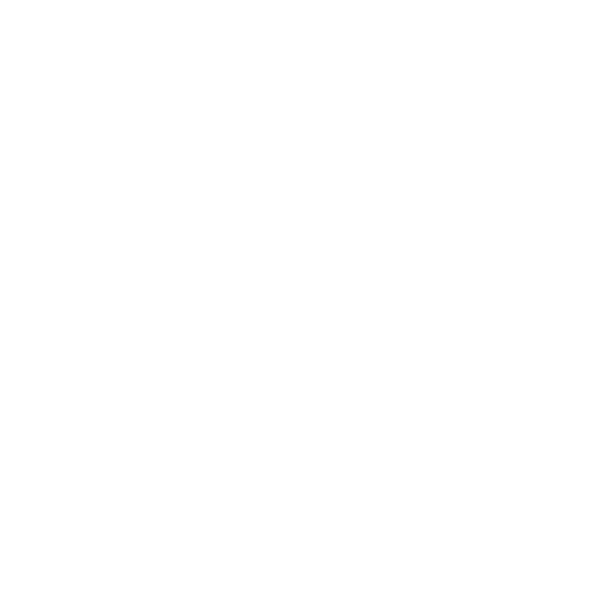

<IPython.core.display.Javascript object>


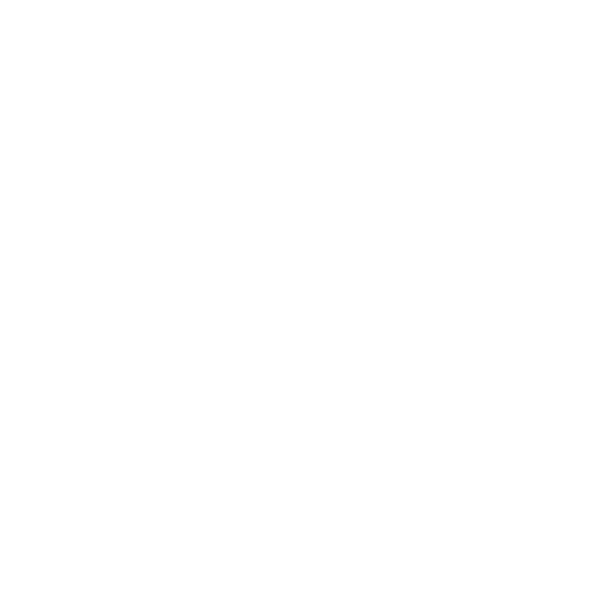

<IPython.core.display.Javascript object>


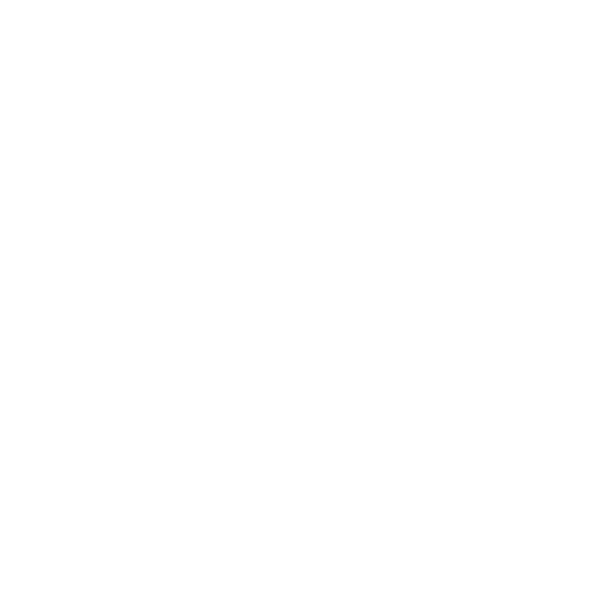

<IPython.core.display.Javascript object>


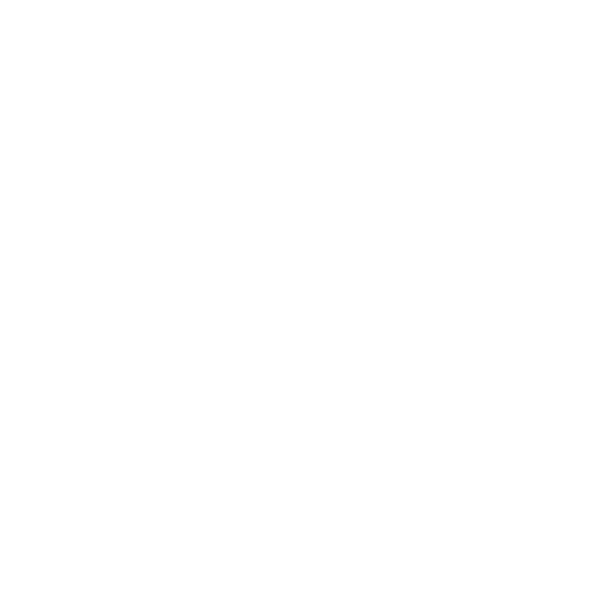

<IPython.core.display.Javascript object>


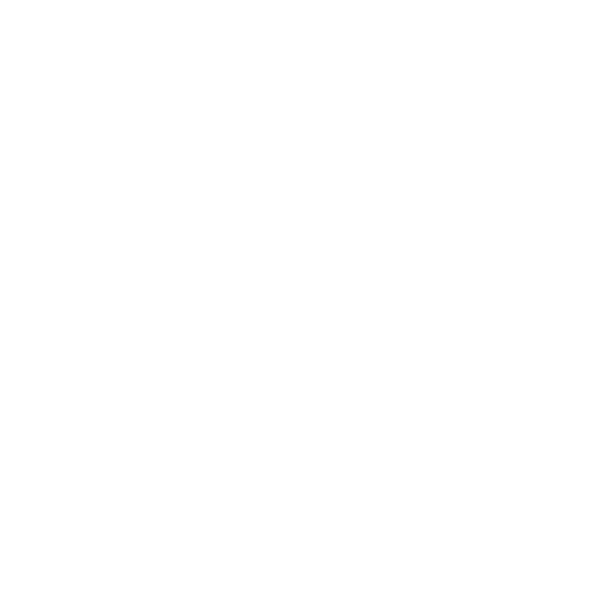

<IPython.core.display.Javascript object>


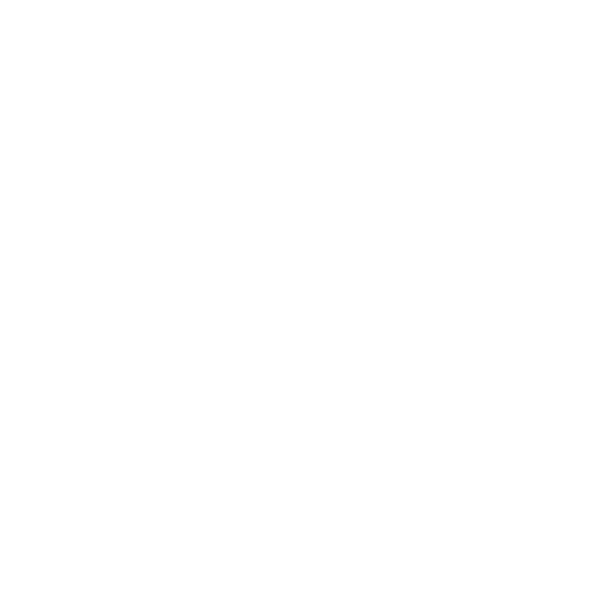

<IPython.core.display.Javascript object>


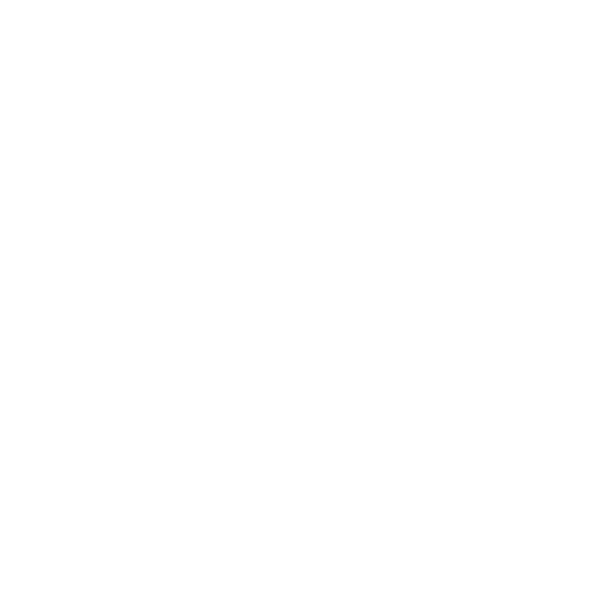

<IPython.core.display.Javascript object>


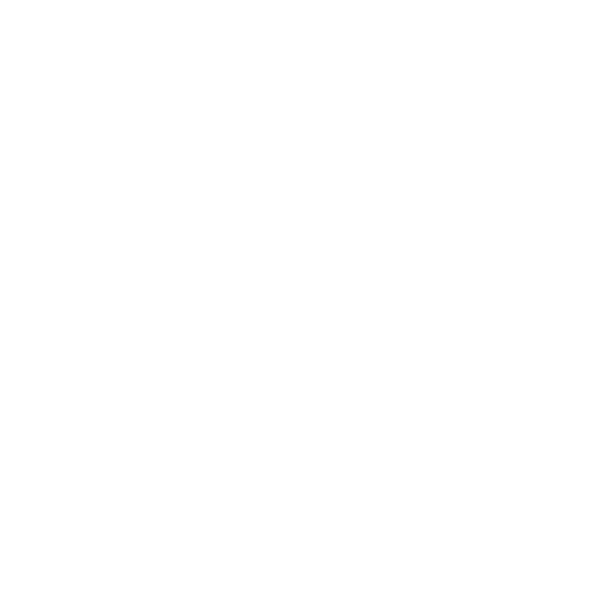

<IPython.core.display.Javascript object>


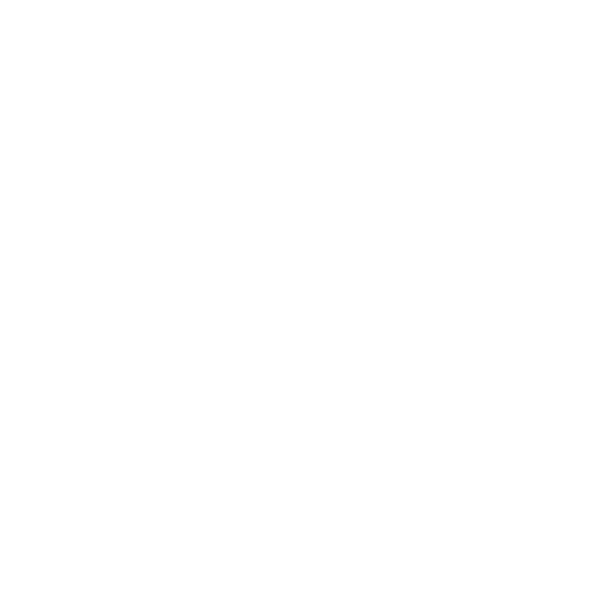

<IPython.core.display.Javascript object>


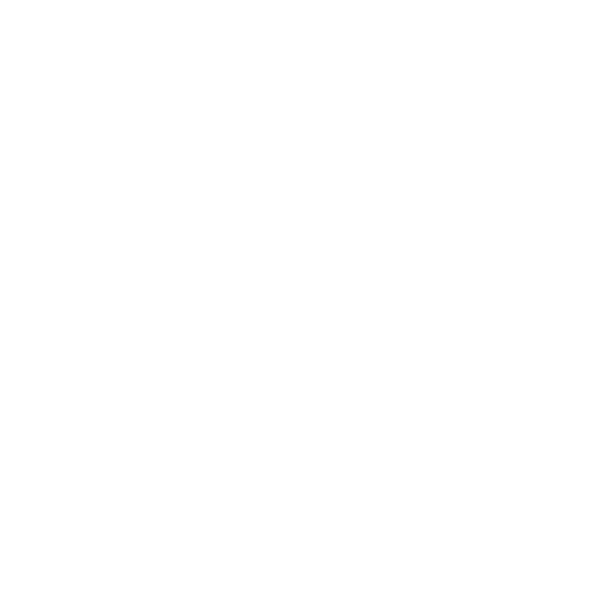

<IPython.core.display.Javascript object>


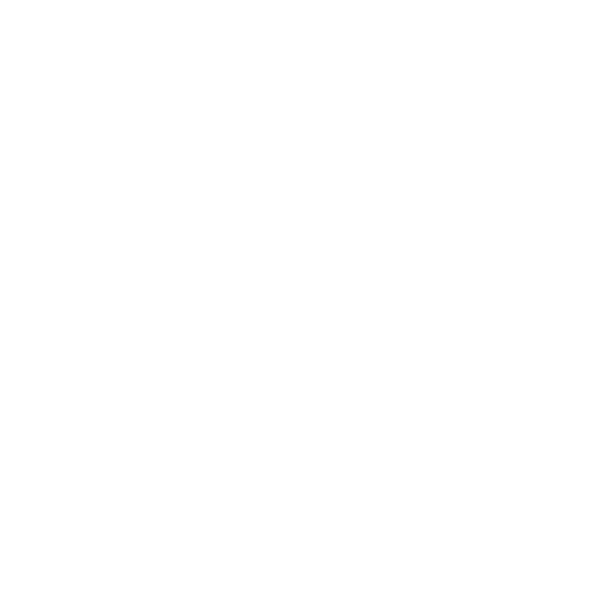

<IPython.core.display.Javascript object>


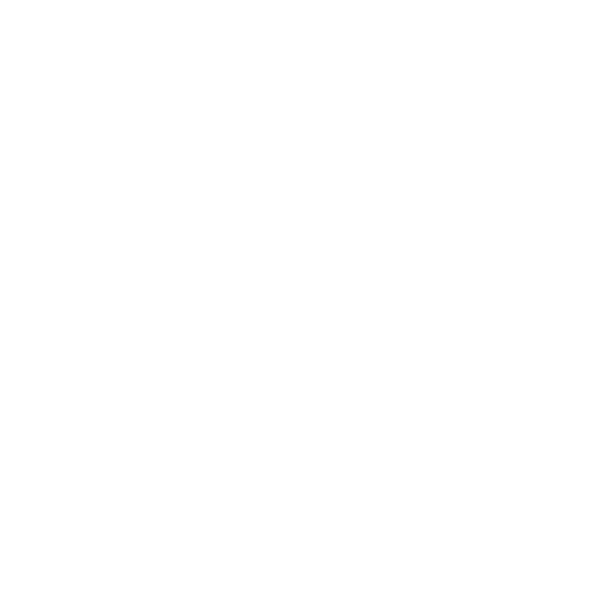

<IPython.core.display.Javascript object>


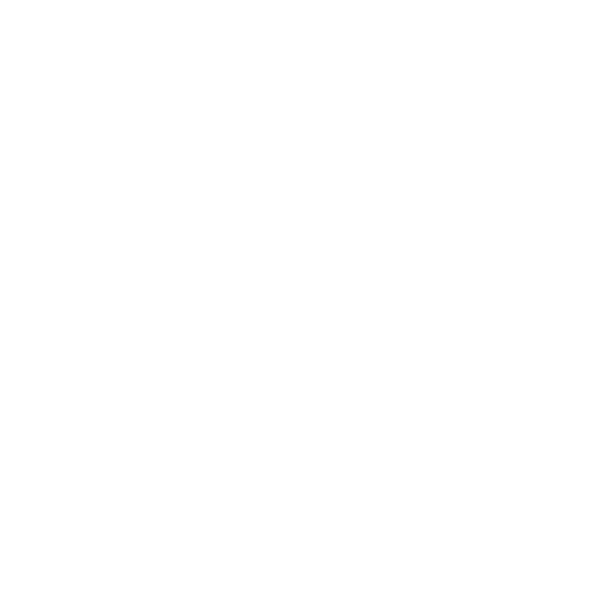

<IPython.core.display.Javascript object>


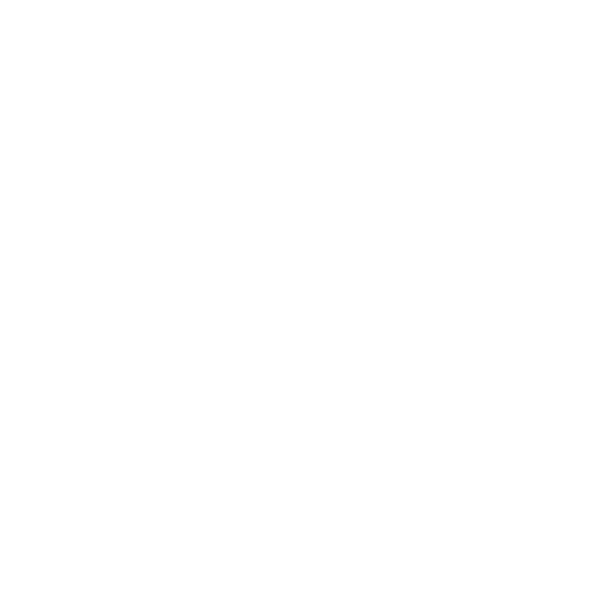

<IPython.core.display.Javascript object>


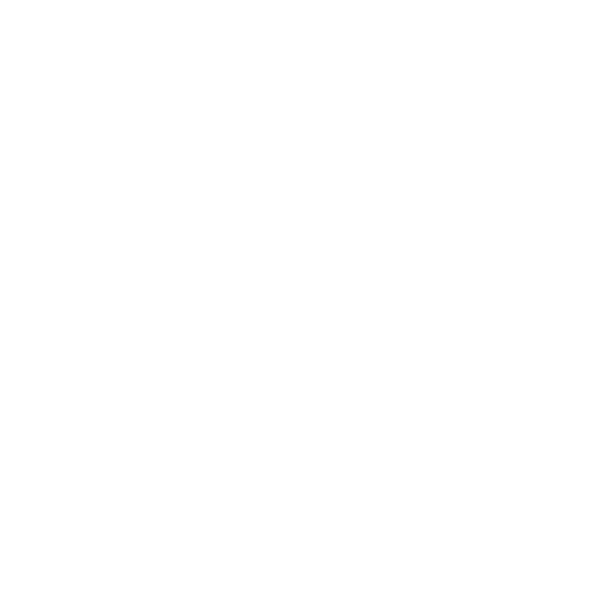

<IPython.core.display.Javascript object>


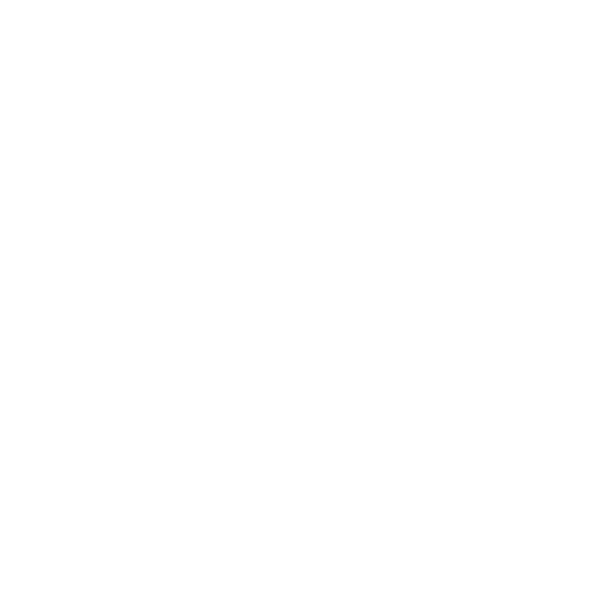

<IPython.core.display.Javascript object>


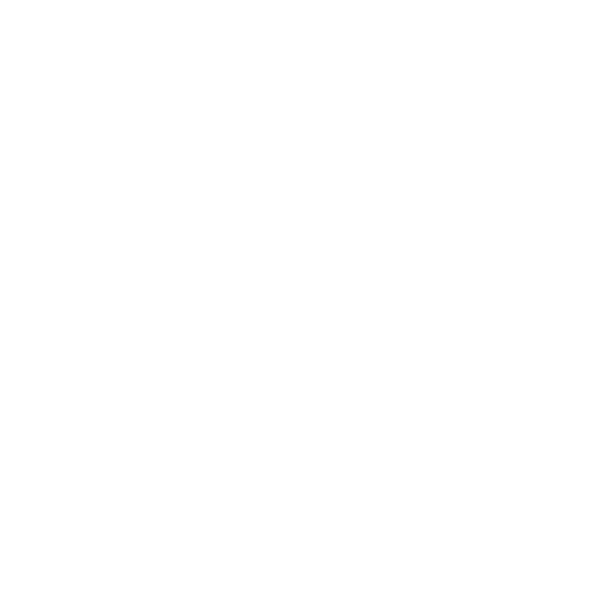

<IPython.core.display.Javascript object>


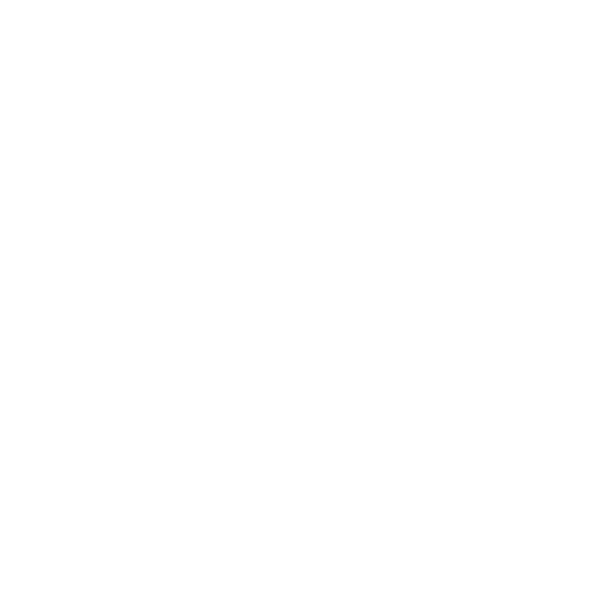

<IPython.core.display.Javascript object>


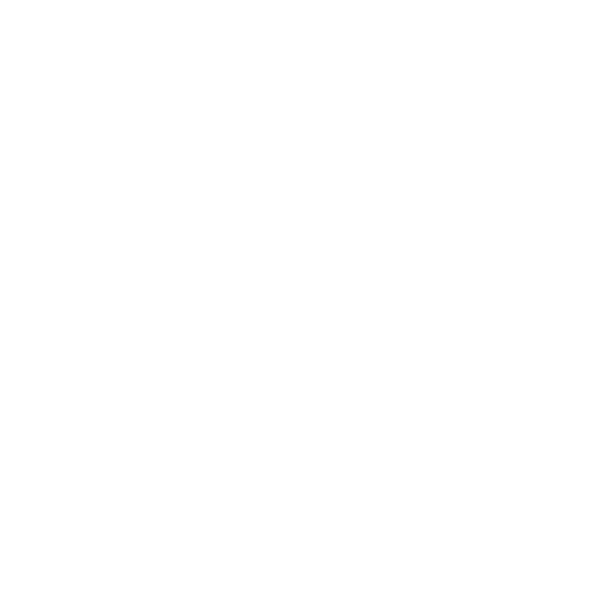

<IPython.core.display.Javascript object>


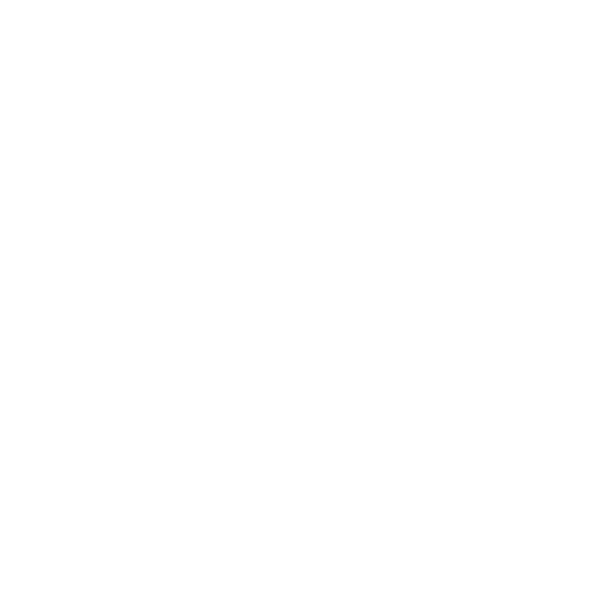

<IPython.core.display.Javascript object>


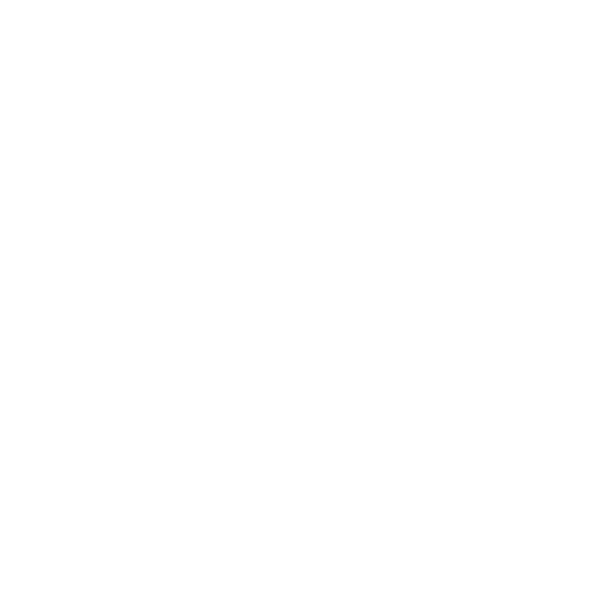

<IPython.core.display.Javascript object>


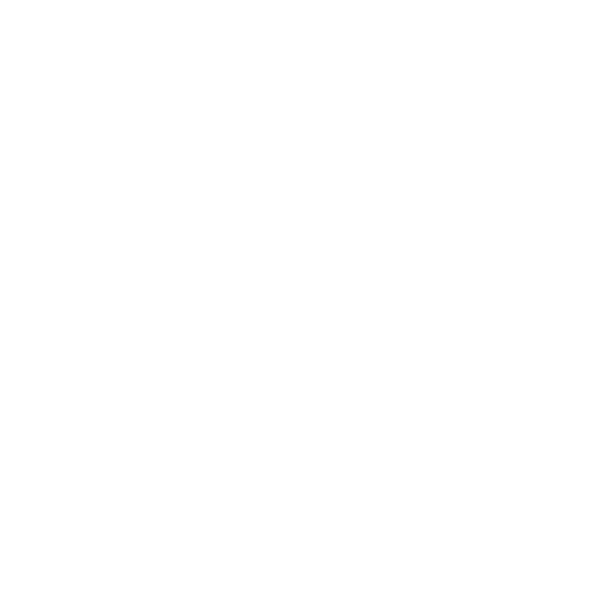

<IPython.core.display.Javascript object>


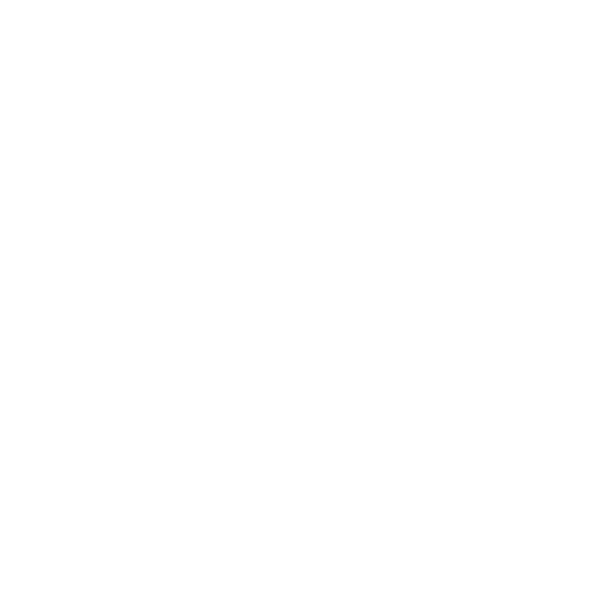

<IPython.core.display.Javascript object>


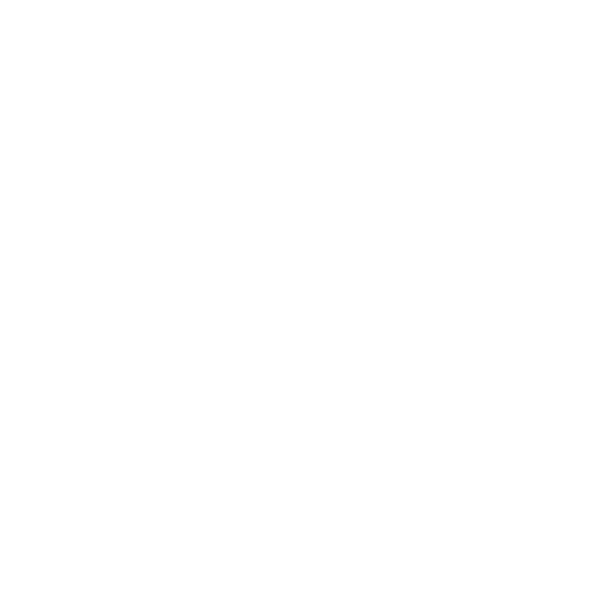

<IPython.core.display.Javascript object>


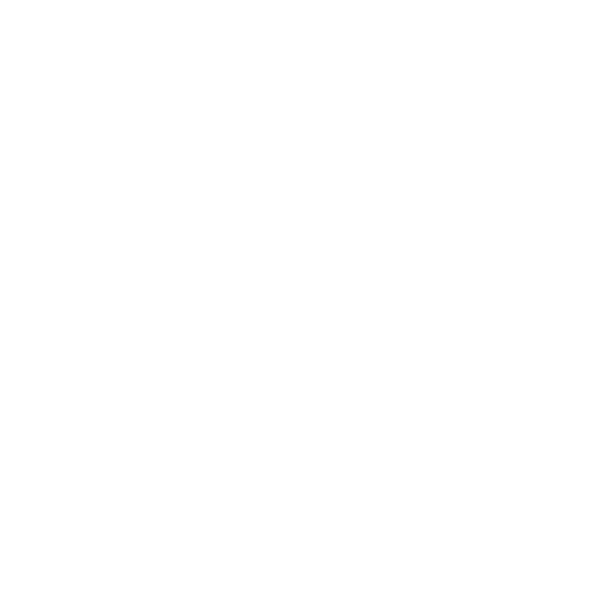

<IPython.core.display.Javascript object>


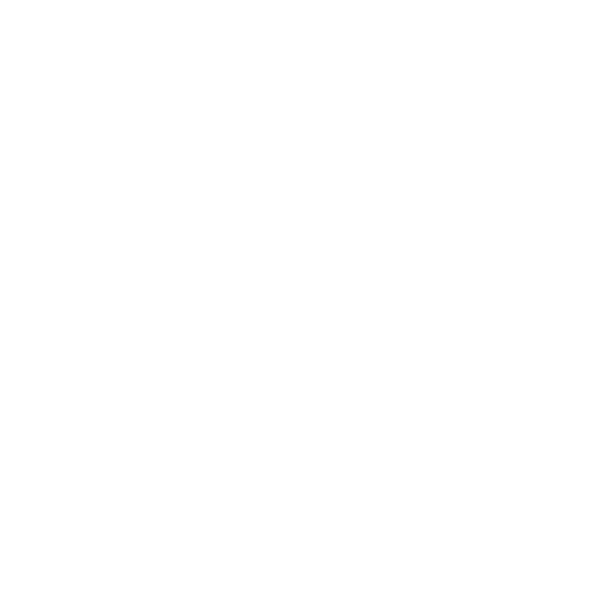

<IPython.core.display.Javascript object>


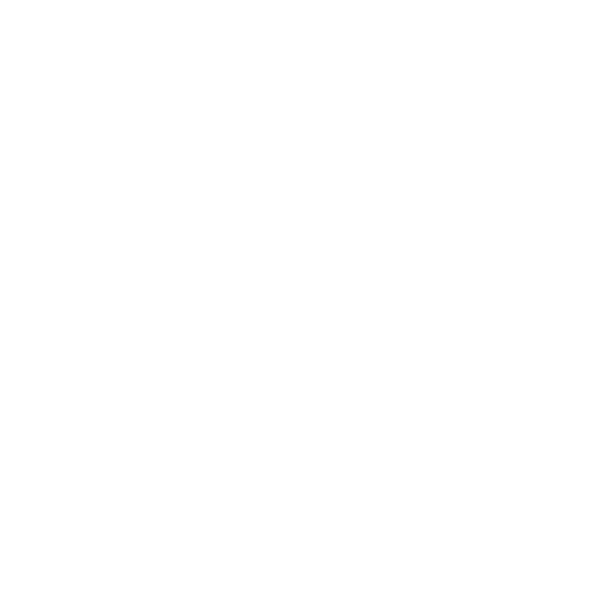

<IPython.core.display.Javascript object>


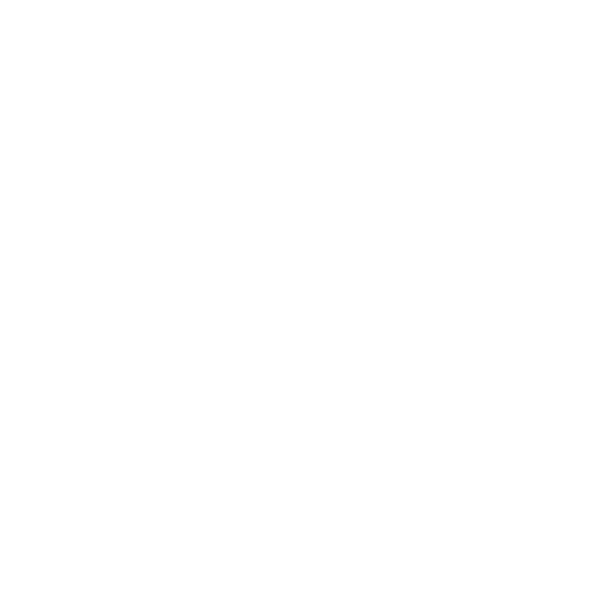

<IPython.core.display.Javascript object>


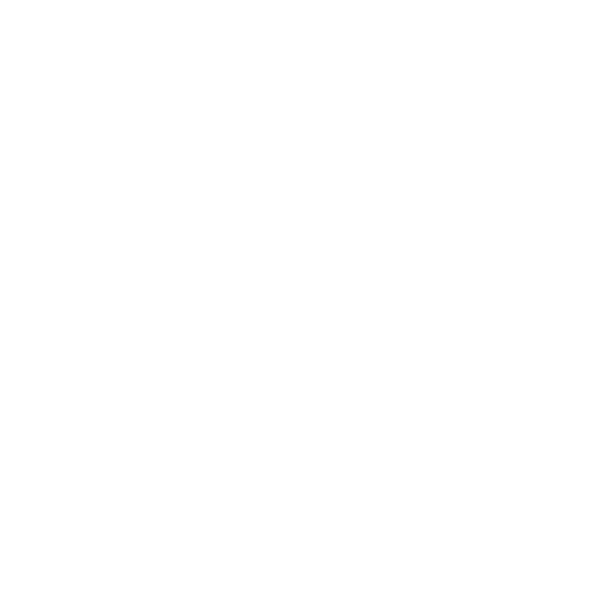

<IPython.core.display.Javascript object>


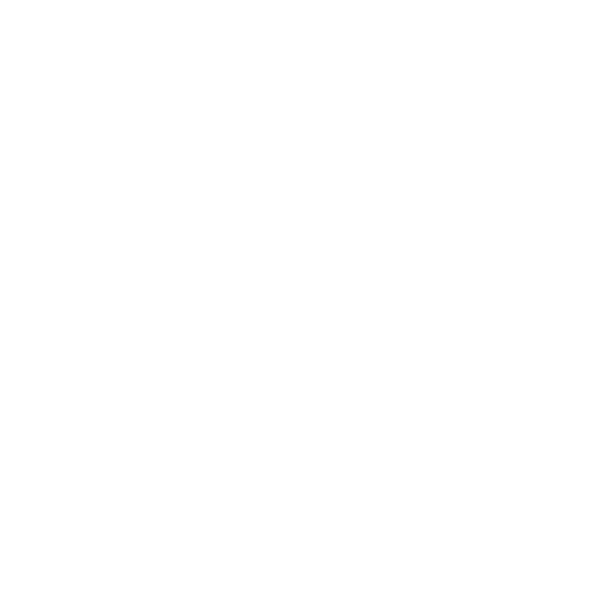

<IPython.core.display.Javascript object>


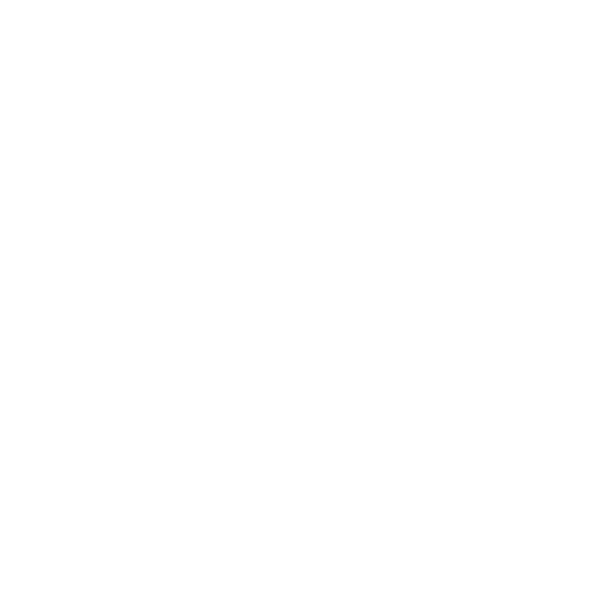

<IPython.core.display.Javascript object>


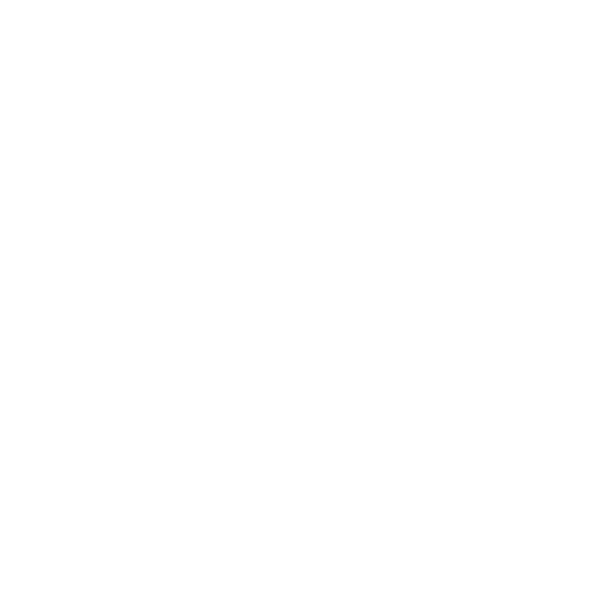

<IPython.core.display.Javascript object>


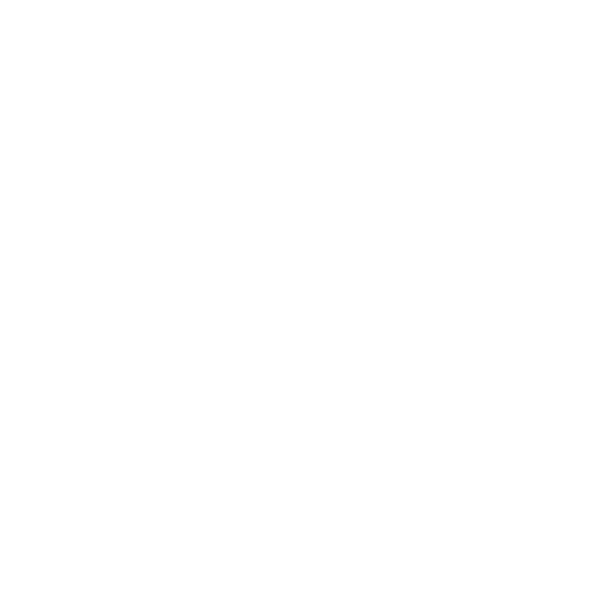

<IPython.core.display.Javascript object>


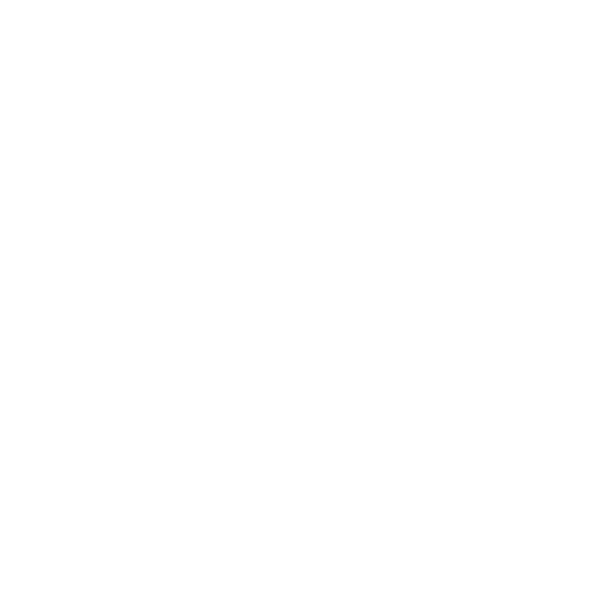

In [39]:
azimut = np.linspace(0,360,60)
fig_id = 0
filelist = []

for a in azimut:
    fig = plt.figure(figsize=(6,6))

    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(Xt, Yt, Zt,  rstride=4, cstride=4, color="blue", linewidth=0.5 )

    index = np.where( VoidParticleCat[:,0] == n)[0]
    Void_ID = VoidParticleCat[index, 1:4]
    x_p = Void_ID[:,0]
    y_p = Void_ID[:,1]
    z_p = Void_ID[:,2]


    x_p -= x_p.mean()
    y_p -= y_p.mean()
    z_p -= z_p.mean()

    ax.view_init(15, a)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.set_title("Ellipsoid for Void # {}".format(n))

    ax.scatter(x_p,y_p,z_p, color="red", s=20)
    
    filename=("Void123/{}.png".format(fig_id))
    fig.savefig(filename)
    filelist.append(filename)
    fig_id +=1
    plt.close()


In [40]:
import imageio

with imageio.get_writer('Void123/movie.gif', mode='I') as writer:
    for filename in filelist:
        image = imageio.imread(filename)
        writer.append_data(image)